<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/06_Prediction_Model_MNIST_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Measuring model performance**

In classification, accuracy is used as the common metric for measuring model performance. Accuracy is defined as the fraction of correct predictions over total predictions made by a model.

**The digits recognition dataset**

The MNIST database of handwritten digits, available @ http://yann.lecun.com/exdb/mnist/, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. 

The digits have been size-normalized and centered in a fixed-size image.
It is a good database to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

**scikit-learn MNIST dataset**

A reduced version of the MNIST dataset is one of scikit-learn's included datasets. 

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 

The scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. 

Scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys available with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images.

In [0]:
# Import necessary modules
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [4]:
# Create feature and target arrays
X = digits.data
y = digits.target
print("Feature Array\n", X)
print("\nTarget Array\n", y)

Feature Array
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Target Array
 [0 1 2 ... 8 9 8]


Split the dataset into training and test sets

In [5]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
print("Feature Train vs Test split:", X_train.shape, X_test.shape)
print("Prediction Train vs Test split:", y_train.shape, y_test.shape)

Feature Train vs Test split: (1437, 64) (360, 64)
Prediction Train vs Test split: (1437,) (360,)


**k-NN classifier with 7 neighbors: knn**

In [6]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Accuracy of the model

In [7]:
# Print the accuracy
print(round(knn.score(X_test, y_test),2))

0.98


**Model complexity**

1. Larger k -> smoother decision boundary -> less complex model
2. Smaller k -> more complex model -> can lead to overfitting

![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/kNN_complexity.jpg)

![alt text](https://raw.githubusercontent.com/raj-vijay/ml/master/images/kNN.jpg)

Image Source: Andreas Müller & Sarah Guido, Introduction to Machine Learning with Python

**Overfitting and underfitting**

Now we construct the model complexity curve for the digits dataset. 

To accomplish this we will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop our intuition for overfitting and underfitting.

In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

Evaluation of accuracy for different values of k in k-NN algorithm

In [0]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

**The model complexity curve**

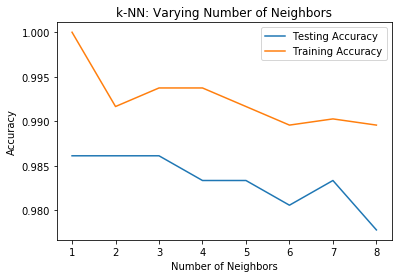

In [11]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
